In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')

df=dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
df["job_skills"]=df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Hassaan Yousaf\anaconda3\envs\pythonproj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df_da_us=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]



In [30]:
df_da_us['job_posted_date']=pd.to_datetime(df_da_us.job_posted_date)
df_da_us['job_posted_month']=df_da_us['job_posted_date'].dt.strftime('%b')

C:\Users\Hassaan Yousaf\AppData\Local\Temp\ipykernel_30064\3445157667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da_us['job_posted_date']=pd.to_datetime(df_da_us.job_posted_date)
C:\Users\Hassaan Yousaf\AppData\Local\Temp\ipykernel_30064\3445157667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da_us['job_posted_month']=df_da_us['job_posted_date'].dt.strftime('%b')


In [31]:
df_exploded=df_da_us.explode("job_skills")

In [32]:
df_pivot=df_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size',fill_value=0)
df_pivot.loc['total']=df_pivot.sum()
df_pivot
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending=False).index]

df_pivot=df_pivot.drop('total')

df_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Apr,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
Aug,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
Dec,1848,1525,1080,1076,780,658,699,451,394,265,...,0,1,0,0,1,0,0,0,1,0
Feb,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
Jan,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
Jul,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
Jun,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
Mar,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
May,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0


In [33]:
df_total=df_da_us.groupby('job_posted_month').size()

In [34]:
df_pivot_percentage=df_pivot.div(df_total,axis=0)*100


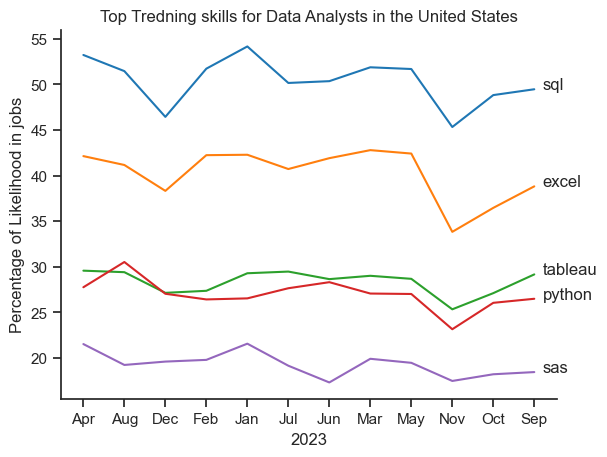

In [43]:
df_plot=df_pivot_percentage.iloc[: , :5]
sns.set_theme(style='ticks')
sns.lineplot(data=df_plot, dashes=False, palette="tab10")
plt.title("Top Tredning skills for Data Analysts in the United States")
plt.xlabel("2023")
plt.ylabel("Percentage of Likelihood in jobs")
plt.legend().remove()
sns.despine()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i])